<a href="https://colab.research.google.com/github/VicenteMercado/ADA-Informes/blob/main/Informe10_BellmanFord.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Problema de optimización.

**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e$ asociado a cada arco $e\in E$.

**Salida**: Una de las siguientes opciones:

1. La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.
2. Una declaración indicando que $G$ contiene un ciclo negativo.

![image](https://static.javatpoint.com/tutorial/daa/images/bellman-ford-algorithm4.png)


En el último informe, revisamos y analizamos a fondo un algoritmo que respondía al problema del *árbol recubridor mínimo*, el cual pasa por todos los nodos de un grafo y consigue el valor mínimo posible.

Ahora bien, existen problemas que siguen una lógica similar a este. Por ejemplo, suponiendo que tenemos un **grafo dirigido ponderado y un vértice fuente**, queremos conocer el camino más corto hacia el resto de los vértices existentes en el grafo. Esto se conoce como **el problema del camino más corto**. Una de las respuestas hacia esta problemática es el *Algoritmo de Bellman-Ford*, el cual a diferencia de el de Dijkstra, también permite arcos negativos.

#2. Algoritmo de Bellman-Ford. (Shortest Path Problem)

##2.1 Código

El siguiente código muestra una implementación del algoritmo de Bellman-Ford, el cual utiliza el paradigma de **programación dinámica**.

In [2]:
import random
import networkx as nx
from sys import maxsize
import matplotlib.pyplot as plt

visualize = False
verbose = False

def showGraph(G):
  # spring_layout: define posiciones para los nodos del grafo
  pos=nx.spring_layout(G)

  # para mostrar los arcos con sus etiquetas
  labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=14)

  # para mostrar los nodos en sus posiciones y colores, tamaños, etc.
  nx.draw(G,pos, node_color='blue', with_labels=True, node_size=700, font_color="white", font_size=14, font_weight="black", width  =1.0, edge_color ="blue")

def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(-25, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]


def BellmanFord(graph, V, E, src, verbose):
 
    # Inicializa la distancia de cada vértice como infinito.
    dis = [maxsize] * V
 
    # Inicializamos la distancia del vértice fuente como 0.
    dis[src] = 0

    if(verbose): 
      print(f"Inicializamos la lista de distancias como números infinitamente grandes, y la posición {src} será 0.")
      print(dis)
      print("")
    

    # Se relajan los arcos |V| - 1 veces.
    # El camino más corto del vértice fuente a cualquier
    # otro vértice puede tener a lo más |V| - 1 arcos. 
    if(verbose): print(f"Se procede a realizar el relajamiento de los arcos |V| - 1  = {V-1} veces.")
    for i in range(V - 1):
        if(verbose):
          print("") 
          print(f"Pasada por arcos número {i+1}")
          print("")
        for j in range(E):
            if(verbose): print(f"Arco número {j+1} = {graph[j]}")
            if dis[graph[j][0]] + \
                   graph[j][2] < dis[graph[j][1]]:
                if(verbose): 
                  print(f"{dis[graph[j][0]]} + {graph[j][2]} es menor que {dis[graph[j][1]]}, se actualiza el valor.")
                dis[graph[j][1]] = dis[graph[j][0]] + \
                                       graph[j][2]
            else:
              if(verbose): 
                print(f"{dis[graph[j][0]]} + {graph[j][2]} mayor o igual que {dis[graph[j][1]]}, se conserva el valor.")
            
            if(verbose): 
              print(dis)
              print("")
            
    
    # Revisar por si existen ciclos negativos.
    # Si se obtiene un camino más corto en este paso, entonces existe un ciclo.
    if(verbose): 
      print("Se revisa la existencia de ciclos negativos.")
      print("")
    for i in range(E):
        if(verbose): print(f"Arco número {i+1} = {graph[i]}")
        x = graph[i][0]
        y = graph[i][1]
        weight = graph[i][2]
        if dis[x] != maxsize and dis[x] + \
                        weight < dis[y]:
            print("El grafo contiene un ciclo negativo!")
            return []
        if(verbose): 
          print(f"dis[{x}] ({dis[x]}) + {weight} es mayor o igual a dis[{y}] ({dis[y]}), no se halló un ciclo negativo.")
          print("")

    
    return dis
      

#Ejemplo

V = 3 # Vértices del grafo.
grafo, vInicio = instance_generator(V)
E = len(grafo) #Arcos del grafo.
 
# Cada arco posee tres valores (i, j, w), donde
# el vértice i se conecta hacia y con el vértice j, y w es el peso
# del arco.

print("Grafo de entrada: ", grafo)
if(visualize):
  grafoDi = graph_to_nxdigraph(grafo, V)
  showGraph(grafoDi)
  plt.title("Grafo de entrada")
  plt.show()

print("Vértice inicial: ", vInicio)
print("")

dist= BellmanFord(grafo, V, E, vInicio, verbose)

if(len(dist) != 0):
  print("Distancia de cada vértice respecto del inicial:")
  for i in range(V):
      print("%d\t\t%d" % (i, dist[i]))

Grafo de entrada:  [(0, 2, 7), (2, 1, 74), (2, 1, 55), (1, 0, 74)]
Vértice inicial:  0

Distancia de cada vértice respecto del inicial:
0		0
1		62
2		7


##2.2 Descripción del algoritmo.

**Subestructura óptima**

Como en este caso estamos trabajando bajo el paradigma de la **programación dinámica**, hay que definir la subestructura óptima de nuestro problema antes de pasar a explicar el funcionamiento del algoritmo.

Supongamos que la cantidad de arcos de la ruta óptima $P$ para ir de $s$ a $v$ es $i$. La ruta más corta $P$ la podríamos obtener calculando las rutas más cortas $P’$  entre $s$ y un nodo intermedio $w$, limitada a $i-1$ arcos. Luego, sumaríamos la distancia entre $w$ y $v$, y nos quedaríamos con la mejor alternativa.

![image](https://chartreuse-goal-d5c.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2Ffddd9b5c-071a-4413-8f7d-229ad407e880%2FUntitled.png?table=block&id=e9d843f8-abec-4773-925d-3e254110810d&spaceId=4f8bebe4-a843-44d2-b6ee-51e2006a90d1&width=2000&userId=&cache=v2)

*¿Qué ocurre si no se conoce la cantidad de arcos de la ruta óptima?*

Podemos cambiar la definición del problema/subproblemas a resolver: queremos encontrar la ruta óptima $P$ considerando $i$ arcos **o menos**.

A partir de aquí, pueden suceder dos casos:

- La ruta más corta tiene $i-1$ arcos o menos, por lo tanto, bastaría con encontrar la ruta más corta para $i-1$ arcos o menos. **(Caso 1)**
- La ruta más corta tiene efectivamente $i$ arcos, por lo que realizamos la subdivisión de subproblemas explicada anteriormente. **(Caso 2)**

Cómo sabemos que la cantidad máxima de arcos para una ruta más corta es de $n-1$, para obtener la solución del problema original deberíamos encontrar la rutamás corta con $i=n-1$.

**Función recursiva**

Una vez comprendidos los subproblemas que iremos creando, podemos definir la función de recurrencia. 

Consideremos como $L_{i,v}$ el largo mínimo de un camino $s\leadsto v$ con a lo más $i-1$ arcos y ciclos permitidos. Luego, para todo $i\geq 1$ y $v \in V$ tenemos que:

$L_{i,v} =
\min \left\{
 \begin{array}{cc}
 L_{i-1,v} & \text{(case 1)} \\
 \min\limits_{(w,v)\in E} \{L_{i-1,w}+l_{wv}\} & \text{(case 2)}
    	\end{array}
\right\}$

Los **subproblemas de base** serían, para todo $v\in V$:

$L_{0,v} =
\left\{
\begin{array}{cc}
0 & \text{si $$s=v$$} \\
+\infty & \text{en otro caso.}
\end{array}
\right.$

**Funcionamiento del algoritmo**

El algoritmo recibe como entrada un grafo dirigido y ponderado $G=(V,E)$ con $V$ los $n$ nodos del grafo y $E$ arcos con el valor real $l_e$ de cada arco, además de un vértice inicial $v \in V$.

1. Creamos un arreglo `dis` con `V` posiciones que almacenará la distancia entre un vértice y el inicial `src`. Inicializamos todas las posiciones como un valor infinitamente alto, a excepción de la posición `dis[src]` que tendrá el valor `0`.

2. Se procede a "relajar" los arcos del grafo de entrada `graph` para hallar los caminos más cortos.
Para cada valor de `i` desde `0` a `V-1`, se cumple que para cada valor de `j` desde `0` a `E`, se dice que si `dis[graph[j][0]] + graph[j][2]` resulta ser menor que `dis[graph[j][1]]`, el segundo tomará el valor del primero. En caso contrario se mantiene.

3. Se revisa si existen ciclos negativos en nuestro resultado. Para cada valor de `i` desde `0` a `E`, inicializamos lo valores `x = graph[i][0]`, `y = graph[i][1]` y `weight = graph[i][2]`. Luego, si `dis[x]` no es un número infinitamente alto y `dis[x] + weight` es menor a `dis[y]`, decimos que el grafo contiene un ciclo negativo, retornando una lista vacía junto con un mensaje pertinente por pantalla.

4. Finalmente, retornamos el arreglo `dis`.

$V$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es `True`, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.

Cuando la variable `visualize` es `True`, se muestra por pantalla el grafo de entrada en cuestión.

##2.3 Ejemplo

Considere un grafo conexo no dirigido de $V=3$ vértices, cuyos arcos son:

$graph = [(2, 0, 97), (1, 2, 71), (0, 1, -5)]$

Y un vértice fuente $src = 2$.

Primero, creamos un arreglo auxiliar $dis$ con los $V$ vértices del grafo, e inicializamos todas las posiciones como un número infinitamente grande, a excepción de la posición del vértice fuente que se inicia como $0$.

$dis = [+\infty, +\infty, 0]$

Luego, comenzamos a buscar los caminos más cortos desde el vértice fuente a los demás mediante el relajamiento de los arcos, lo cual se realiza $|V|-1$ veces. Para cada valor $i$ desde $0$ hasta $(|V|-1)-1 = 1$, se hace que para cada valor $j$ desde $0$ hasta $E-1 = 2$, se busca el valor menor entre la distancia del vértice fuente al vértice `graph[j][0]` más el peso de su arco, y la distancia del vértice fuente al vértice `graph[j][1]`.

$i = 0:$

$j = 0:$

$dis[graph[j][1]] = min(dis[graph[j][1]], dis[graph[j][0]] + graph[j][2])$

$dis[0] = min(dis[0], dis[2] + 97)$

$dis[0] = min(+\infty, 0 + 97) = 97$

$dis = [97, +\infty, 0]$


$j = 1:$

$dis[graph[j][1]] = min(dis[graph[j][1]], dis[graph[j][0]] + graph[j][2])$

$dis[2] = min(dis[2], dis[1] + 71)$

$dis[2] = min(0, +\infty + 71) = 0$

$dis = [97, +\infty, 0]$


$j = 2:$

$dis[graph[j][1]] = min(dis[graph[j][1]], dis[graph[j][0]] + graph[j][2])$

$dis[1] = min(dis[1], dis[0] + (-5))$

$dis[1] = min(+\infty, 97 + (-5)) = 92$

$dis = [97, 92, 0]$


Realizamos este procedimiento para los $E$ arcos hasta las $i$ veces necesarias.

$i = 1:$

$j = 0:$

$dis[graph[j][1]] = min(dis[graph[j][1]], dis[graph[j][0]] + graph[j][2])$

$dis[0] = min(dis[0], dis[2] + 97)$

$dis[0] = min(97, 0 + 97) = 97$

$dis = [97, 92, 0]$


$j = 1:$

$dis[graph[j][1]] = min(dis[graph[j][1]], dis[graph[j][0]] + graph[j][2])$

$dis[2] = min(dis[2], dis[1] + 71)$

$dis[2] = min(0, 92 + 71) = 0$

$dis = [97, 92, 0]$


$j = 2:$

$dis[graph[j][1]] = min(dis[graph[j][1]], dis[graph[j][0]] + graph[j][2])$

$dis[1] = min(dis[1], dis[0] + (-5))$

$dis[1] = min(92, 97 + (-5)) = 92$

$dis = [97, 92, 0]$

Ahora que hemos hallados las potenciales rutas más cortas desde el vértice fuente hacia los demás vértices, debemos también asegurarnos de que no se hayan formado ciclos negativos, o de lo contrario no tendría sentido hablar sobre "caminos más cortos". Para hacer esto, debemos revisar cada arco del grafo una última vez y ver que no se formen caminos más cortos que los ya encontrados.

Utilizaremos la variable $i$ esta vez, y por cada arco iniciaremos tres valores `x = graph[i][0]`, `y = graph[i][1]` y `weight = graph[i][2]` con el fín de simplificar las expresiones.

$i = 0:$

$x = graph[i][0] = 2 $

$y = graph[i][1] = 0 $

$weight = graph[i][2] = 97$

$¿dis[x=2] + weight < dis[y=0] --> 0 + 97 < 97? = NO$

Como no se cumple la desigualdad, entonces no se ha encontrado un ciclo negativo. Se repite este procedimiento con cada arco restante ó hasta hallar un ciclo negativo.

$i = 1:$

$x = graph[i][0] = 1 $

$y = graph[i][1] = 2 $

$weight = graph[i][2] = 71$

$¿dis[x=1] + weight < dis[y=2] --> 92 + 71 < 0? = NO$


$i = 2:$

$x = graph[i][0] = 0 $

$y = graph[i][1] = 1 $

$weight = graph[i][2] = -5$

$¿dis[x=0] + weight < dis[y=1] -->  97 + (-5) < 92? = NO$


Ya que no se encontró ningún ciclo negativo, tenemos finalmente nuestros caminos más cortos para este caso.

$dis = [97, 92, 0]$


##2.4 Ejecución del programa paso a paso.

Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo. Con propósito de probar distintos casos, se utilizará un listado de 5 claves a buscar, con arcos cuyos pesos son generados al azar.

In [3]:
verbose = True
visualize = False

V = 5 # Vértices del grafo.
grafo, vInicio = instance_generator(V)
E = len(grafo) #Arcos del grafo.
 
# Cada arco posee tres valores (i, j, w), donde
# el vértice i se conecta hacia y con el vértice j, y w es el peso
# del arco.

print("Grafo de entrada: ", grafo)
print("Vértice inicial: ", vInicio)
print("")

dist= BellmanFord(grafo, V, E, vInicio, verbose)

if(len(dist) != 0):
  print("Distancia de cada vértice respecto del inicial:")
  for i in range(V):
      print("%d\t\t%d" % (i, dist[i]))

Grafo de entrada:  [(3, 1, 70), (3, 4, 51), (3, 0, 90), (4, 2, 68), (2, 0, 20), (1, 4, 72), (1, 0, 79), (1, 2, 21), (0, 4, 78), (2, 3, 92)]
Vértice inicial:  3

Inicializamos la lista de distancias como números infinitamente grandes, y la posición 3 será 0.
[9223372036854775807, 9223372036854775807, 9223372036854775807, 0, 9223372036854775807]

Se procede a realizar el relajamiento de los arcos |V| - 1  = 4 veces.

Pasada por arcos número 1

Arco número 1 = (3, 1, 70)
0 + 70 es menor que 9223372036854775807, se actualiza el valor.
[9223372036854775807, 70, 9223372036854775807, 0, 9223372036854775807]

Arco número 2 = (3, 4, 51)
0 + 51 es menor que 9223372036854775807, se actualiza el valor.
[9223372036854775807, 70, 9223372036854775807, 0, 51]

Arco número 3 = (3, 0, 90)
0 + 90 es menor que 9223372036854775807, se actualiza el valor.
[90, 70, 9223372036854775807, 0, 51]

Arco número 4 = (4, 2, 68)
51 + 68 es menor que 9223372036854775807, se actualiza el valor.
[90, 70, 119, 0, 51]

Ar

##2.5 Visualización de grafo de entrada.

Usando la opción `visualize = True`, podemos ver por pantalla el grafo de entrada que se va a utilizar en cada ejecución del código. Con propósito de probar distintos casos, se utilizará un listado de 5 claves a buscar, con arcos cuyos pesos son generados al azar.

Grafo de entrada:  [(4, 1, 95), (0, 4, 70), (2, 1, 98), (2, 3, 89), (2, 0, 11), (3, 1, 29), (1, 0, 64), (4, 2, 28)]
Vértice inicial:  4



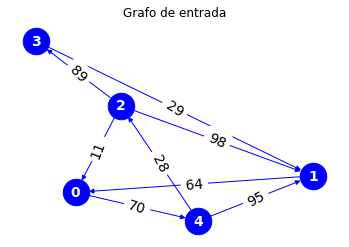

Distancia de cada vértice respecto del inicial:
0		39
1		95
2		28
3		117
4		0


In [7]:
visualize = True
verbose = False

V = 5 # Vértices del grafo.
grafo, vInicio = instance_generator(V)
E = len(grafo) #Arcos del grafo.
 
# Cada arco posee tres valores (i, j, w), donde
# el vértice i se conecta hacia y con el vértice j, y w es el peso
# del arco.

print("Grafo de entrada: ", grafo)
print("Vértice inicial: ", vInicio)
print("")

if(visualize):
  grafoDi = graph_to_nxdigraph(grafo, V)
  showGraph(grafoDi)
  plt.title("Grafo de entrada")
  plt.show()

dist= BellmanFord(grafo, V, E, vInicio, verbose)

if(len(dist) != 0):
  print("Distancia de cada vértice respecto del inicial:")
  for i in range(V):
      print("%d\t\t%d" % (i, dist[i]))

#3. Algoritmo de Dijkstra (Shortest Path Problem with positive edge weights)

Además del algoritmo previamente descrito, también existe otro método que soluciona el problema del camino más corto, denominado **Algoritmo de Dijkstra**, el cual trabaja únicamente con grafos cuyos arcos poseen pesos positivos.


**Entrada**: Un grafo dirigido $G=(V,E)$, un vértice fuente $s\in V$, y un valor real $l_e \geq 0$ asociado a cada arco $e\in E$.

**Salida**: La distancia más corta $dist(s,v)$ para cada vértice $v\in V$.

##3.1 Código

El siguiente código muestra una implementación del algoritmo de Bellman-Ford, el cual utiliza el paradigma de un **algoritmo voraz**.

In [11]:
import random
import networkx as nx
from sys import maxsize
import matplotlib.pyplot as plt

verbose = False
visualize = False

def showGraph(G):
  # spring_layout: define posiciones para los nodos del grafo
  pos=nx.spring_layout(G)

  # para mostrar los arcos con sus etiquetas
  labels = nx.get_edge_attributes(G,'weight')
  nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_size=14)

  # para mostrar los nodos en sus posiciones y colores, tamaños, etc.
  nx.draw(G,pos, node_color='blue', with_labels=True, node_size=700, font_color="white", font_size=14, font_weight="black", width  =1.0, edge_color ="blue")

def graph_to_nxdigraph(graph: list, n: int):
    """
        Input: Un grafo en formato list[tuple]. Ej: [(0, 1, 10), (1, 2, 15), (2, 0, 7)].
        Output: Un nx.DiGraph de la libreria networkx.
    """
    nxdigraph = nx.DiGraph()
    [nxdigraph.add_node(i) for i in range(n)]

    for v in graph:
        nxdigraph.add_edge(v[0], v[1], weight=v[2])

    return nxdigraph

def is_valid_edge(generated_edges: dict, i: int, j: int):
    return i != j and not generated_edges.get((i, j), None) and not generated_edges.get((j, i), None)

def instance_generator(n: int):
    """
        Input: cantidad de vértices
        Output: una lista que contiene todos los arcos y el número del vértice fuente (la función retorna dos variables).
        Los arcos vienen en la forma (i, j, weight), donde i es el vértice origen del arco y j el vértice al que apunta el arco, mientras que weight es su peso.
    """
    graph = []
    nodes = random.sample(range(0, n), n)
    unvisited_nodes = random.sample(range(0, n), n)
    
    generated_edges = {}
    for i in nodes:
        rand = random.sample(nodes, random.randint(1, 3))

        for j in rand:
            edge = (i, j)
            edge_with_weight = (i, j, random.randint(1, 100))
            
            if generated_edges.get((edge[1], edge[0]), None):
                continue
            
            if i == j:
                new_vertice = None
                iterations = 0
                while new_vertice is None and iterations < 250:
                    iterations += 1
                    number = random.randint(0, n - 1)
                    if is_valid_edge(generated_edges, i, number):
                        new_vertice = number

                if iterations >= 250:
                    return instance_generator(n)
                
                edge = (i, new_vertice)
                edge_with_weight = (i, new_vertice, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
            
            graph.append(edge_with_weight)
            generated_edges[edge] = edge

            if edge_with_weight[1] in unvisited_nodes:
                unvisited_nodes.remove(edge_with_weight[1])

    for i in unvisited_nodes:
        valid_edge = False
        iterations = 0
        while not valid_edge and iterations < 250:
            iterations += 1
            m = random.randint(0, n - 1)
            if is_valid_edge(generated_edges, m, i):
                valid_edge = True
                edge = (m, i)
                edge_with_weight = (m, i, random.randint(0, 100)) # -25 y 100 corresponde a los límites de los pesos, puede cambiarlos.
                graph.append(edge_with_weight)
                generated_edges[edge] = edge

        if iterations >= 250:
            return instance_generator(n)

    return graph, graph[0][0]

#Función que permite conseguir el vértice con la menor distancia al vértice fuente
#que aún no haya sido revisado.
def minDistance(V, dis, sptSet):
  min = maxsize
  min_index = 0
  for u in range(V):
    if dis[u] < min and sptSet[u] == False:
      min = dis[u]
      min_index = u
    
  return min_index


def dijkstraAlgorithm(graph, V, E, src, verbose):

    # Inicializa la distancia de cada vértice como infinito.
    dis = [maxsize] * V
    # Inicializamos la distancia del vértice fuente como 0.
    dis[src] = 0

    if(verbose): 
      print(f"Inicializamos la lista de distancias como números infinitamente grandes, y la posición {src} será 0.")
      print(dis)
      print("")
  
    sptSet = [False] * V #Lista que indica si un vértice fue revisado o no.

    listaV = [[0] * V for v in range(V)] 

    for u in range(E):
      listaV[graph[u][0]][graph[u][1]] = graph[u][2]
    
    if(verbose): 
      print(f"Creamos una arreglo con cada vértice y sus conexiones.")
      print(listaV)
      print("")


    for i in range(V):
      #Se elige el vértice con la menor distancia al vértice fuente aún no revisado.
      x = minDistance(V, dis, sptSet)
      if(verbose): print(f"El vértice {x} posee la menor distancia. Se procede a revisar los vértices adyacentes.")
      sptSet[x] = True #Se deja como revisado.

      for y in range(V):
        #Si se encuentra un nodo adyacente aún no revisado cuya distancia al vértice fuente es mayor a la distancia entre el
        #nodo elegido y el vértice fuente junto al peso de la conexión x --> y, se actualiza el valor del primero al del segundo.
        if listaV[x][y] > 0 and sptSet[y] == False and dis[y] > dis[x] + listaV[x][y]:
           if(verbose): print(f"Existe una conexión desde {x} a {y} no revisada y la distancia desde {src} a {y} ({dis[y]}) es mayor a \nla distancia desde {src} a {x} ({dis[x]}) + y el arco {x} -> {y} ({listaV[x][y]})")
           dis[y] = dis[x] + listaV[x][y]
           if(verbose): 
             print(f"El nuevo valor de la distancia del vértice fuente hacia {y} es {dis[y]}")
             print("")
        else:
          if(verbose and listaV[x][y] == 0): print(f"No existe una conexión desde {x} a {y}")
          if(verbose and sptSet[y] == True): print(f"Existe una conexión desde {x} a {y} ya revisada.")
          if(verbose and dis[y] < dis[x] + listaV[x][y]): print(f"la distancia desde {src} a {y} ({dis[y]}) es menor ó igual a la distancia desde {src} a {x} ({dis[x]}) + y el arco {x} -> {y} ({listaV[x][y]})")
          if(verbose): print("")
    
    return dis #Retornamos las distancias óptimas halladas.

#Ejemplo

V = 5 # Vértices del grafo.
grafo, vInicio = instance_generator(V)
E = len(grafo) #Arcos del grafo.
 
# Cada arco posee tres valores (i, j, w), donde
# el vértice i se conecta hacia y con el vértice j, y w es el peso
# del arco.

print("Grafo de entrada: ", grafo)
if(visualize):
  grafoDi = graph_to_nxdigraph(grafo, V)
  showGraph(grafoDi)
  plt.title("Grafo de entrada")
  plt.show()

print("Vértice inicial: ", vInicio)
print("")

dist = dijkstraAlgorithm(grafo, V, E, vInicio, verbose)

print("Distancia de cada vértice respecto del inicial:")
for i in range(V):
    print("%d\t\t%d" % (i, dist[i]))

Grafo de entrada:  [(0, 3, 98), (0, 4, 88), (0, 1, 85), (1, 2, 5), (3, 4, 88), (3, 1, 70), (3, 2, 3), (2, 0, 20)]
Vértice inicial:  0

Distancia de cada vértice respecto del inicial:
0		0
1		85
2		90
3		98
4		88


##3.2 Descripción del algoritmo.

El algoritmo recibe como entrada un grafo dirigido y ponderado $G=(V,E)$ con $V$ los $n$ nodos del grafo y $E$ arcos con el valor real $l_e$ de cada arco, además de un vértice inicial $v \in V$.

1. Creamos un arreglo `dis` con `V` posiciones que almacenará la distancia entre un vértice y el inicial `src`. Inicializamos todas las posiciones como un valor infinitamente alto, a excepción de la posición `dis[src]` que tendrá el valor `0`.

2. Creamos un arreglo `sptSet` con `V` posiciones que estima si un vértice ha sido incluido en el SPT (árbol del camino más corto) o no. Sus posiciones se inicializan como `False`.

3. Creamos un arreglo `listaV` con `V` posiciones de `V` posiciones cada una, con el fin de almacenar los pesos de la conexiones de cada vértice hacia otros. Luego, para cada `u` entre `0` y `E`, `listaV[graph[u][0]][graph[u][1]]` tomará el valor de `graph[u][2]`.

4. Por cada valor de `i` entre `0` y `V`, se inicializa una variable `x` que será el vértice del grafo con la menor distancia, lo cual se consigue gracias a la función `minDistance`. 

 * `minDistance` inicializa un valor `min` como un número infinitamente grande. Luego, para cada valor de `u` desde `0` hasta `V`, se dice que si `dis[u]` es menor que `min` y a la vez `sptSet[u]` es `False`, entonces `min` tomará el valor de `dis[u]` y se crea una variable `min_index` que tomará el valor del índice `u`. Al terminar el ciclo de `u`, retorna el valor `min_index`.

5. Dentro del **paso 4** y para cada valor de `y`entre `0` y `V`, se dice que si `listaV[x][y] > 0`, `sptSet[y]` es `False` y `dis[y] > dis[x] + listaV[x][y]`, entonces `dis[y]` tomará el valor de `dis[x] + listaV[x][y]`.

6. Finalmente, se retorna el arreglo `dis`.

$V$ será el tamaño del problema en cuestión.

Cuando la variable `verbose` es `True`, se muestra información por pantalla para ver lo que sucede paso a paso dentro de la función de una forma más explícita.

Cuando la variable `visualize` es `True`, se muestra por pantalla el grafo de entrada en cuestión.

##3.3 Ejemplo

Considere un grafo conexo no dirigido de $V=3$ vértices, cuyos arcos son:

$graph = [(2, 0, 97), (1, 2, 71), (0, 1, 5)]$

Y un vértice fuente $src = 2$.

Primero, creamos un arreglo auxiliar $dis$ con los $V$ vértices del grafo, e inicializamos todas las posiciones como un número infinitamente grande, a excepción de la posición del vértice fuente que se inicia como $0$.

$dis = [+\infty, +\infty, 0]$

Luego, generamos un arreglo $sptSet$ que almacenará un valor booleano para saber si un vértice fue procesado o no, inicializando las posiciones como el segundo caso.

$sptSet = [False, False, False]$

También creamos una lista $listaV$ que almacenará los pesos de las conexiones dirigidas para cada uno de los vértices hacia los demás.

$listaV = [[0,5,0],[0,0,71],[97,0,0]]$

Luego, usando una variable $i$, por cada vértice en el grafo buscaremos un vértice con la menor distancia a partir del vértice fuente **que aún no haya sido procesado**, y revisaremos sus nodos adyacentes $y$ para poder dar con un camino óptimo entre el vértice fuente y un cierto adyacente.

$i = 0$

$minDistance(V, dis, sptSet)$

 * Para hallar esta distancia mínima con `minDistance`, se hará lo siguiente: Primero usamos una variable $min$ que será infinitamente grande al principio, y luego revisamos cada nodo preguntando si su distancia con el nodo fuente es menor a $min$ y aún no ha sido procesado, entonces se actualizará $min$ con dicho valor y una variable $minIndex$ almacenará el número del vértice. Esto hasta pasar por todos los nodos, consiguiendo así el vértice de menor distancia.

$min = +\infty$

$¿min < dis[0] = +\infty?  --> NO ; ¿sptSet[0] == False? --> SI$

$¿min < dis[1] = +\infty?  --> NO ; ¿sptSet[0] == False? --> SI$

$¿min < dis[2] = 0?  --> SI ; ¿sptSet[0] == False? --> SI$

$min = 0 ; minIndex = 2$

Como este nodo será procesado, dejamos constancia en:

$sptSet = [False, False, True]$

Ahora que tenemos el vértice con la menor distancia, revisamos sus nodos adyacentes:

$y = 0$

$¿listaV[2][0] > 0? --> SI ; ¿sptSet[0] == False? --> SÍ$

$¿dis[0] (+\infty) > dis[2] (0) + listaV[2][0] (97)? --> SI$

Como cumple las tres condiciones, actualizamos:

$dis[0] = 97$

$dis = [97, +\infty, 0]

Realizamos esto con cada nodo adyacente al vértice escogido.

$y = 1$

$¿listaV[2][1] > 0? --> NO ; ¿sptSet[1] == False? --> SI$

$y = 2$

$¿listaV[2][2] > 0? --> NO ; ¿sptSet[2] == False? --> NO$

Ahora, debemos realizar todo el procedimiento descrito anteriormente para cada nodo de nuestro grafo.

$i = 1$

$minDistance(V, dis, sptSet) = 0$

$sptSet = [True, False, True]$

$y = 0$

$¿listaV[0][0] > 0? --> NO ; ¿sptSet[0] == False? --> NO$

$y = 1$

$¿listaV[0][1] > 0? --> SI ; ¿sptSet[1] == False? --> SI$

$¿dis[1] (+\infty) > dis[0] (97) + listaV[0][1] (5)? --> SI$

Como cumple las tres condiciones, actualizamos:

$dis[1] = 102$

$dis = [97, 102, 0]$

$y = 2$

$¿listaV[0][2] > 0? --> NO ; ¿sptSet[2] == False? --> NO$

$i=2$

$minDistance(V, dis, sptSet) = 1$

$sptSet = [True, True, True]$

$y = 0$

$¿listaV[1][0] > 0? --> NO ; ¿sptSet[0] == False? --> NO$

$y = 1$

$¿listaV[1][1] > 0? --> NO ; ¿sptSet[1] == False? --> NO$

$y = 2$

$¿listaV[1][2] > 0? --> SI ; ¿sptSet[2] == False? --> NO$


Como ya analizamos todos los vértices del nodo junto a cada uno de sus respectivos nodos adyacentes, tenemos finalmente nuestros caminos más cortos para este caso.

$dis = [97, 102, 0]$



##3.4 Ejecución del programa paso a paso.

Usando la opción `verbose = True`, se puede apreciar qué ocurre durante el proceso del algoritmo. Con propósito de probar distintos casos, se utilizará un listado de 5 claves a buscar, con arcos cuyos pesos son generados al azar.

In [10]:
verbose = True

V = 3 # Vértices del grafo.
grafo, vInicio = instance_generator(V)
E = len(grafo) #Arcos del grafo.
 
# Cada arco posee tres valores (i, j, w), donde
# el vértice i se conecta hacia y con el vértice j, y w es el peso
# del arco.

print("Grafo de entrada: ", grafo)
print("Vértice inicial: ", vInicio)
print("")

dist= dijkstraAlgorithm(grafo, V, E, vInicio, verbose)

if(len(dist) != 0):
  print("Distancia de cada vértice respecto del inicial:")
  for i in range(V):
      print("%d\t\t%d" % (i, dist[i]))

Grafo de entrada:  [(0, 2, 73), (2, 1, 11), (2, 1, 32), (1, 0, 42)]
Vértice inicial:  0

Inicializamos la lista de distancias como números infinitamente grandes, y la posición 0 será 0.
[0, 9223372036854775807, 9223372036854775807]

Creamos una arreglo con cada vértice y sus conexiones.
[[0, 0, 73], [42, 0, 0], [0, 32, 0]]

El vértice 0 posee la menor distancia. Se procede a revisar los vértices adyacentes.
No existe una conexión desde 0 a 0
Existe una conexión desde 0 a 0 ya revisada.

No existe una conexión desde 0 a 1

Existe una conexión desde 0 a 2 no revisada y la distancia desde 0 a 2 (9223372036854775807) es mayor a 
la distancia desde 0 a 0 (0) + y el arco 0 -> 2 (73)
El nuevo valor de la distancia del vértice fuente hacia 2 es 73

El vértice 2 posee la menor distancia. Se procede a revisar los vértices adyacentes.
No existe una conexión desde 2 a 0
Existe una conexión desde 2 a 0 ya revisada.
la distancia desde 0 a 0 (0) es menor ó igual a la distancia desde 0 a 2 (73) + y el

#4. Tiempo de ejecución

##Teorema 1 **(Bellman-Ford)**

El algoritmo `BellmanFord` posee un tiempo de ejecución $O(V^3)$ en su **peor caso**, $O(E)$ en su **mejor caso** y tiene un tiempo promedio $O(V*E)$

###Prueba del teorema 1

Si analizamos cuidadosamente el código de nuestro algoritmo, nos daremos cuenta que:

* Primero se inicializan las distancias de cada uno de los nodos del grafo de entrada como un número infinitamente grande (excepto la posición del vértice fuente que será 0), lo cual toma un tiempo O(V).
* Por cada nodo del grafo de entrada, se recorren sus arcos y se van "relajando" (Se reduce la distancia del arco hasta dar con el camino más corto). Recorrer los nodos del grafo toma un tiempo $O(V)$, recorrer sus arcos toma $O(E)$ y la relajación de un arco posee tiempo $O(1)$, por lo que finalmente todo este paso toma un tiempo $O(V*E)$. 
* Finalmente, se recorren los arcos del grafo revisando si alguno de ellos posee una distancia negativa o si todos son positivos, lo cual toma un tiempo $O(E)$.

Con todos estos pasos en cuenta, tenemos la función:

$T(n) = O(V) + O(V*E) + O(1) + O(E)$. 

Luego, tras realizar los cálculos necesarios y como posee el mayor costo frente al resto de las operaciones, podemos concluir que el algoritmo toma un tiempo total O(V*E).


**PEOR CASO:**

El peor caso se genera comúnmente cuando los vértices del grafo de entrada poseen la mayor cantidad posible de conexiones entre ellos, es decir, $E = V^2$.

Al reemplazar la variable dentro del tiempo de ejecución previamente hallado, damos con que efectivamente nuestro peor tiempo será $O(V * V^2) = O(V^3)$


**MEJOR CASO:**

El mejor caso se genera cuando los vértices del grafo de entrada poseen sólamente una conexión entre cada uno de manera consecutiva. Es decir, van de "izquierda a derecha", por lo que sería necesario recorrer los arcos una única vez.

Debido a esto, el tiempo de ejecución en este caso será proporcional a la cantidad de arcos existentes, ósea, $O(E)$. 

##Teorema 2 **(Dijkstra)**

El algoritmo `dijkstraAlgorithm`, implementado utilizando un **arreglo auxiliar**, posee un tiempo de ejecución $O(V^2)$ **en su mejor y peor caso**.

###Prueba del teorema 2

Si analizamos cuidadosamente el código de nuestro algoritmo, podemos apreciar que:

* Primero se inicializan las distancias de cada uno de los nodos del grafo de entrada como un número infinitamente grande (excepto la posición del vértice fuente que será 0), además también de inicializar cada uno de dichos nodos como no incluidos en el SPT aún. Ambas operaciones toman un tiempo $O(V)$.

* Se crea una lista que almacena las conexiones dirigidas de cada nodo con los demás, lo cual toma un tiempo $O(V^2)$. También se rellena cada posición con los datos correspondientes a los arcos de cada vértice, esto toma un tiempo $O(E)$.

* Por cada nodo visitado, se consigue el vértice con la menor distancia de entre los nodos aún no incluidos en el SPT, luego se incluye dicho nodo y se busca la distancia mínima entre los nodos adyacentes al conseguido. Analizar cada nodo, conseguir el vértice con la menor distancia y revisar los nodos adyacentes toman un tiempo $O(V)$. Como la últimas dos operaciones mencionadas ocurren por cada iteración de la primera, la operación total toma un tiempo $O(V^2)$.

Con todos estos pasos en cuenta, tenemos la función:

$T(n) = 2*O(V) + O(E) + 2*O(V^2) $. 

Luego, tras realizar los cálculos necesarios y como posee el mayor costo frente al resto de las operaciones, podemos concluir que el algoritmo toma un tiempo total $O(V^2)$.

#5. Correctitud

##5.1 Teorema (Correctitud del algoritmo de Bellman-Ford)

*El algoritmo Bellman-Ford calcula correctamente la distancia de un nodo inicial s al resto de nodos de un grafo G sin ciclos negativos.*

###Prueba del teorema

Para probar la correctitud de este algoritmo, se empleará la siguiente **hipótesis $P(n)$**:

> En la $k$-ésima iteración del algoritmo, la distancia de $s$ a cada nodo $v$ separado como máximo por $k$ arcos es igual a la distancia del camino más corto.

**Caso base**

Para el caso base, es decir, antes de la primera iteración, el único nodo separado por $k = 0$ arcos de $s$ es el propio nodo $s$. Sabemos que el algoritmo inicializa esta distancia en 0, por lo tanto, se cumple trivialmente la hipótesis para este caso.

**Caso inductivo**

Por inducción, al comenzar la iteración $k+1$ sabemos que la distancia actual de $s$ a un nodo $v$ corresponde a la distancia del camino más corto que pasa por a lo más $k$ arcos. No obstante, si se considera un arco adicional, podría existir un nuveo valor que minimice dicha distancia. A partir de esto, existen dos posibles casos:

1. El camino más corto de $s$ a $v$ está formado por $k$ arcos o menos. Aquí, ningún camino de $s$ a $v$ formado por exactamente $k+1$ arcos minimizaría la distancia, por ende se mantiene el valor de la iteración previa.

2. El camino más corto de $s$ a $v$ está formado por exactamente $k+1$ arcos. Para este caso, consideremos un nodo $u$ predecesor de $v$ tal que el camino de $s$ a $u$ está formado por $k$ arcos. Por inducción, sabemos que la distancia al nodo $u$ es óptima, luego al sumar dicho valor con el peso del arco $(u,v)$ se obtiene una nueva distancia para $v$. Como en cada iteración se recorren todos los arcos del grafo, sabemos que uno de dichos arcos $(u,v)$ será el que minimiza la distancia a $v$.

Finalmente, el algoritmo realiza un total de $V-1$ iteraciones. *¿Cómo estamos seguros de que son sufcicientes iteraciones para hallar la distancia óptima a todos los nodos del grafo?*

Para el peor caso y para cualquier nodo $v$, el camino más corto desde $s$ a $v$ estará formado por a lo más $V-1$ arcos.

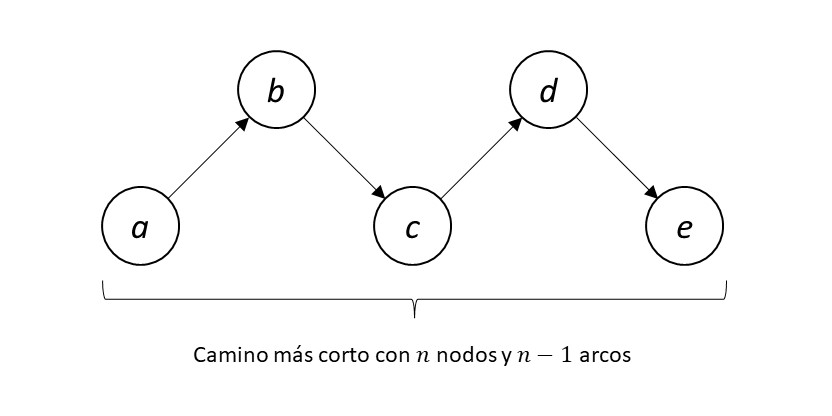

A partir de la hipótesis planteada anteriormente, sabemos que en la última iteración del algoritmo se encontrará la distancia más corta para todos los nodos separados por $V-1$ arcos a lo más, lo cual concuerda con la cantidad máxima de arcos que puede existir entre $s$ y $v$.

Ahora, es también necesario comprobar que, en caso de la presencia de ciclos negativos, esto sea reportado correctamente por el algoritmo, por lo que tenemos el siguiente **corolario**:

> Si distancia minima desde un nodo S un nodo V falla al converger luego de V-1 pasadas, existe un ciclo negativo entre S y V.

La presencia de un ciclo negativo quiere decir que **no existe un subproblema óptimo**, ya que éste conlleva a que el camino más corto contenga arcos infinitos, cuyo peso sería infinito negativo.

Si después de $V-1$ iteraciones para buscar el camino más corto entre $s$ y $v$ hallamos un arco "relajable", esto quiere decir que el camino entre dichos nodos no es simple, ya que posee un nodo repetido. Esta información nos da a entender que existe un ciclo negativo en nuestro grafo, permitiendo al algoritmo finalizar de manera correcta. 


Con todo lo dicho previamente, podemos llegar a la conclusión de que **el algoritmo de Bellman-Ford es correcto.**





#6. Experimentos

##6.1 Tiempo de ejecución (experimental)

El siguiente gráfico mostrará el tiempo de ejecución del algoritmo `bellmanFord`, en función del tamaño del problema `n` entre 3 y 30, siendo esto la cantidad de vértices del grafo de entrada. Por cada uno de estos valores, se realizarán 30 instancias distintas y se tomará la media del tiempo de ejecución en cada caso.

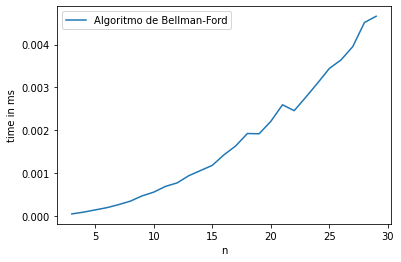

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat

verb = False
visualize = False

x1=[]; y1=[]


for n in range(3,30):
  acum = 0
  cont = 0

  for v in range(30):  
    V = n # Vértices del grafo.
    grafo, vInicio = instance_generator(V)
    E = len(grafo) #Arcos del grafo.

    #la función repeat está ejecutando 20 veces BellmanFord y retorna el mejor tiempo obtenido.
    t = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({grafo}, {V}, {E}, {vInicio}, {verbose})", repeat=1, number=10)
    
    for i in range(len(t)):
      acum += t[i]
    cont += len(t)
    
  media = (acum/cont)
  x1.append(n)
  y1.append(media)



plt.plot(x1,y1)
plt.legend(["Algoritmo de Bellman-Ford"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.show()

###Análisis de resultados

Como podemos apreciar en la grafica generada y a medida que aumenta la cantidad de vértices en el grafo, el tiempo de ejecución del algoritmo sufre un crecimiento intermedio entre uno cúbico y uno lineal (caso promedio), asemejándose más a esto último, lo cual está en sincronía con el teorema propuesto para el mismo en el punto `4.1`.

Cabe destacar que en el trazado existen ciertas irregularidades. Estas se deben a la variabilidad de los tiempos medios de las instancias generadas por cada cantidad de vértices $n$, los cuales también se ven afectados por una cierta cantidad de arcos $E$ para cada una de ellas, siendo esta a lo más $n^2$ arcos en el peor de los casos.


##6.2 Tiempos de ejecución (Dijkstra vs Bellman-Ford)

El siguiente gráfico mostrará la comparación de tiempos de ejecución del algoritmo de Dijkstra frente al algoritmo de Bellman-Ford, en función del tamaño del problema `V` entre 5 y 50.

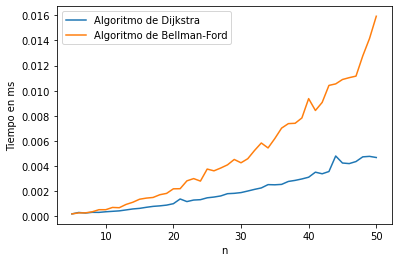

In [ ]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
from copy import deepcopy
import random

verbose = False

x=[]
y_Drijkstra = []
y_BellmanFord = []

for v in range(5,51):

  V = v # Vértices del grafo.
  grafo, vInicio = instance_generator(V)
  E = len(grafo) #Arcos del grafo.

  t_Dijkstra = repeat(setup="from __main__ import dijkstraAlgorithm", stmt=f"dijkstraAlgorithm({grafo}, {V}, {E}, {vInicio}, {verbose})", repeat=1, number=10)
  t_BellmanFord = repeat(setup="from __main__ import BellmanFord", stmt=f"BellmanFord({grafo}, {V}, {E}, {vInicio}, {verbose})", repeat=1, number=10)

  x.append(V)
  y_Drijkstra.append(t_Dijkstra)
  y_BellmanFord.append(t_BellmanFord)


plt.plot(x,y_Drijkstra)
plt.plot(x,y_BellmanFord)

plt.legend(["Algoritmo de Dijkstra", "Algoritmo de Bellman-Ford"])

plt.xlabel('n')
plt.ylabel('Tiempo en ms')
plt.show()

###Análisis de resultados

Observando nuestra grafica generada y tal como era de esperarse dados los teoremas de ambos algoritmos respectivamente, el algoritmo de Dijkstra resulta ser notoriamente más rápido que el de Bellman-Ford. Esto se debe principalmente a que Dijkstra selecciona siempre el nodo de menor distancia que aún no haya sido procesado para poder relajar su conexión hacia los nodos adyacentes a este, mientras que Bellman-Ford directamente relaja todos los arcos $|V|-1$ veces.

Si bien esto actúa en contra del algoritmo de Bellman-Ford en términos de tiempo de ejecución frente al de Dijkstra, a su vez le permite trabajar con arcos negativos, cosa que Dijkstra no puede hacer dado que asume que siempre serán positivos.